### Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from scipy.stats import multivariate_normal

### Necessary Functions

In [2]:
def responsibility_computing(data, weights, means, covariances):
    respon = np.zeros((len(data), len(means)))
    for i in range(len(data)):
        for j in range(len(means)): 
            respon[i, j] = multivariate_normal.pdf(data[i], mean=means[j], cov=covariances[j])*weights[j]
    
    row_sum = respon.sum(axis=1)[:, np.newaxis]
    respon = respon / row_sum
    return respon

In [3]:
def weights_computing(soft_count):
    weights = [0.] * len(soft_count)
    soft_count_sum = np.sum(soft_count)  
    
    for i in range(len(soft_count)):
        weights[i] = soft_count[i]/soft_count_sum
    return weights

In [4]:
def compute_means(data, respon, soft_count):
    n_clusters = len(soft_count)
    n_data = len(data)
    means = [np.zeros(len(data[0]))] * n_clusters 
    
    for i in range(n_clusters):
        weighted_sum = 0.
        for j in range(n_data): 
            weighted_sum += respon[j][i] * data[j]
        
        nk_soft = soft_count[i]
        means[i] = (1/nk_soft)*weighted_sum
    return means

In [5]:
def compute_covariances(data, respon, soft_count, means):
    n_clusters = len(soft_count)
    n_dim = len(data[0])
    n_data = len(data)
    covariances = [np.zeros((n_dim,n_dim))] * n_clusters
    
    for i in range(n_clusters):
        weighted_sum = np.zeros((n_dim, n_dim))
        for j in range(n_data):
            xi,uk = data[j], means[i]
            weighted_sum += respon[j][i]* np.outer(xi-uk,xi-uk)
        
        nk_soft = soft_count[i]
        covariances[i] =(1/nk_soft)*weighted_sum
    return covariances

In [6]:
def soft_counts(respon):
    return np.sum(respon, axis=0)

### Expectation Maximization Function

In [7]:
def EM(data, init_means, init_covariances, init_weights, maxiter=50):
    
    means = init_means[:]
    covariances = init_covariances[:]
    weights = init_weights[:]
    
    n_data = len(data)
    n_dim = len(data[0])
    n_clusters = len(means)
    
    respon = np.zeros((n_data, n_clusters))
    
    for it in range(maxiter):
        if it % 5 == 0:
            print("Iteration %s" % it)
        
        respon = responsibility_computing(data, weights, means, covariances)
        soft_count = soft_counts(respon)
        weights = weights_computing(soft_count)
        means = compute_means(data, respon, soft_count)
        covariances = compute_covariances(data, respon, soft_count, means)
        
    if it % 5 != 0:
        print("Iteration %s" % it)
    
    out = {'weights': weights, 'means': means, 'covs': covariances, 'respon': respon}
    return out

### Test Model

In [8]:
n_samples = 120
dataset = datasets.make_blobs(n_samples=n_samples, random_state=8)
chosen = np.random.choice(90, 3, replace=False)
initial_means = [dataset[0][x] for x in chosen]
initial_covs = [np.cov(dataset[0], rowvar=0)] * 3
initial_weights = [1/3.] * 3

In [9]:
results = EM(dataset[0], initial_means, initial_covs, initial_weights)
results

Iteration 0
Iteration 5
Iteration 10
Iteration 15
Iteration 20
Iteration 25
Iteration 30
Iteration 35
Iteration 40
Iteration 45
Iteration 49


{'weights': [0.33333334213684307, 0.3333333245298235, 0.3333333333333333],
 'means': [array([7.4546571 , 9.46224391]),
  array([7.22713407, 0.50106154]),
  array([-5.40881258, -9.65733346])],
 'covs': [array([[1.33939476, 0.10071716],
         [0.10071716, 1.19416749]]),
  array([[1.05185902, 0.08873175],
         [0.08873175, 1.26170595]]),
  array([[ 0.9732117 , -0.00550796],
         [-0.00550796,  1.03932787]])],
 'respon': array([[3.19842586e-077, 1.01729324e-038, 1.00000000e+000],
        [1.00000000e+000, 1.44812488e-010, 2.67341477e-107],
        [1.83753785e-087, 3.19508687e-046, 1.00000000e+000],
        [1.00000000e+000, 3.20854745e-015, 9.99714171e-126],
        [1.00000000e+000, 1.38622119e-012, 3.67591826e-109],
        [1.84940217e-013, 1.00000000e+000, 1.06435149e-059],
        [1.35849717e-016, 1.00000000e+000, 3.54143921e-052],
        [4.08062582e-086, 1.23812558e-044, 1.00000000e+000],
        [5.53066192e-018, 1.00000000e+000, 1.51087952e-050],
        [8.38990161e

In [10]:
helpful_df = pd.DataFrame(results['respon'])
colors = helpful_df.idxmax(axis=1)

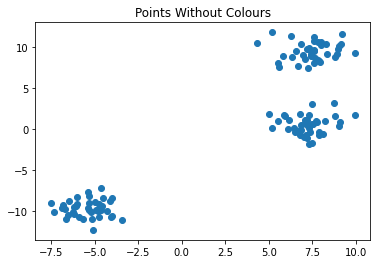

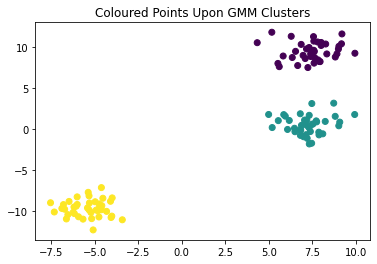

In [11]:
plt.scatter(dataset[0][:,0],dataset[0][:,1])
plt.title('Points Without Colours')
plt.show()

plt.scatter(dataset[0][:,0],dataset[0][:,1],c=colors)
plt.title('Coloured Points Upon GMM Clusters')
plt.show()